# Plot iterations as functions of M and rho

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from corrcalc import CorrelationCalculator

In [10]:
plt.style.use('./correlation.mplstyle')

In [37]:
fig_dir = '../figures'
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

In [9]:
kw = {'log10tol': -3,
      'n_samples': 1000,
      'persist': False,
      }

dslist1 = []
for n_range in [5, 10, 15, 20]:
    dslist2 = []
    for n_apps in [1, 2, 4, 8]:
        cc = CorrelationCalculator(n_range=n_range, n_applications=n_apps, **kw)
        tmp = cc.open_dataset()
        tmp = cc.expand_dims(tmp)
        dslist2.append(tmp['sor_iters'].mean('sample'))
    dslist1.append(xr.concat(dslist2, dim='n_applications'))
    
xda = xr.concat(dslist1, dim='n_range')

In [11]:
xda

<xarray.DataArray 'sor_iters' (log10tol: 1, n_range: 4, n_applications: 4)>
array([[[ 55.   ,  36.   ,  49.   , 138.   ],
        [155.302, 101.471, 104.   , 141.   ],
        [272.192, 189.321, 184.137, 202.593],
        [390.582, 302.845, 295.678, 308.315]]])
Coordinates:
  * log10tol        (log10tol) int64 -3
  * n_range         (n_range) int64 5 10 15 20
  * n_applications  (n_applications) int64 1 2 4 8

In [14]:
xda = xda.squeeze()

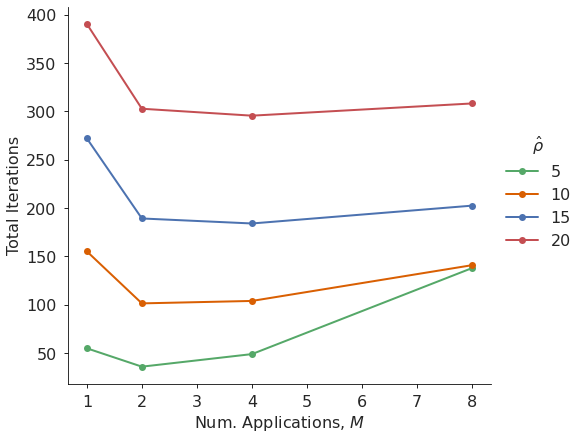

In [38]:
fig, ax = plt.subplots(constrained_layout=True)

xda.plot.line(x='n_applications', ax=ax, marker='o',
              )
ax.set(title='',
       ylabel='Total Iterations',
       xlabel='Num. Applications, $M$',
      )
leg = ax.get_legend()
leg.set(title=r'$\hat{\rho}$',
        bbox_to_anchor=(1.,.7),
       )
fig.savefig(f'{fig_dir}/iterations_vs_applications.pdf', bbox_inches='tight')

### Is this making the diagonal larger?

In [58]:
from MITgcmutils import rdmds

In [80]:
run_dir = '/scratch2/tsmith/generic-matern-covariance/sampling/llc90/matern-04apps-diagdom/log10tol-03-3D-C/run.05dx.01xi/'
center = rdmds(run_dir+'/smooth3DCenter001')

In [81]:
center

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [2.07999992, 2.07999992, 2.07999992, ..., 7.08287954,
         7.07596636, 7.06201744],
        [7.03584528, 6.99103117, 6.92206478, ..., 7.02000427,
         7.0234437 , 7.03651285],
        [7.0480442 , 7.05554008, 7.05240488, ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [2.07999992, 2.07999992, 2.07999992, ..., 8.08286858,
         8.07595444, 8.06200409],
        [8.0

In [39]:
dhat = lambda nr, m : 8* (2*m - 3/2) / nr**2

In [53]:
dh = dhat(10,xda.n_applications)

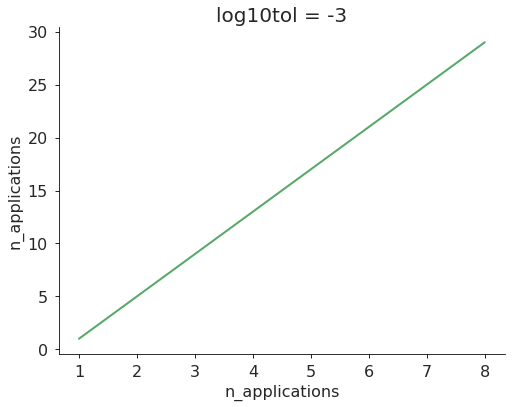

In [54]:
(dh/dh[0]).plot()

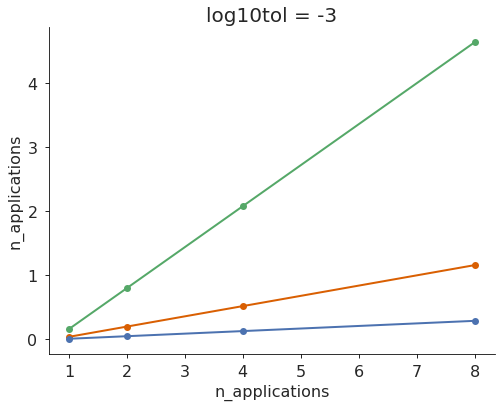

In [55]:
dhat(5,xda.n_applications).plot(marker='o')
dhat(10,xda.n_applications).plot(marker='o')
dhat(20,xda.n_applications).plot(marker='o')